### Importación de datos



In [72]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [73]:
tiendas = {
    "tienda_1" : tienda,
    "tienda_2" : tienda2,
    "tienda_3" : tienda3,
    "tienda_4" : tienda4,
}

#1. Análisis de facturación



In [105]:
for nombre, df in tiendas.items():
  print(f"\n{'='*30}\nIngreso total en {nombre}\n{'='*30}")
  total = df['Precio'].sum()
  print(total)



Ingreso total en tienda_1
1150880400.0

Ingreso total en tienda_2
1116343500.0

Ingreso total en tienda_3
1098019600.0

Ingreso total en tienda_4
1038375700.0


# 2. Ventas por categoría

In [94]:
#Primera opcion: value_counts
for nombre, df in tiendas.items():
  print(f"\n{'='*40}\nProductos vendidos en {nombre}\n{'='*40}")
  ventas = df['Categoría del Producto'].value_counts()
  print(ventas)


Productos vendidos en tienda_1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Productos vendidos en tienda_2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Productos vendidos en tienda_3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Productos ve

# 3. Calificación promedio de la tienda


In [97]:
#Usando mean()
for nombre, df in tiendas.items():
  print(f"\n{'='*40}\nCalificacion promedio en {nombre}\n{'='*40}")
  promedio = df['Calificación'].mean()
  print(f"{promedio:.2f}")


Calificacion promedio en tienda_1
3.98

Calificacion promedio en tienda_2
4.04

Calificacion promedio en tienda_3
4.05

Calificacion promedio en tienda_4
4.00


In [98]:
#Calculo manual
for nombre, df in tiendas.items():
  print(f"\n{'='*40}\nCalificacion promedio en {nombre}\n{'='*40}")
  promedio = df['Calificación'].sum() / df['Calificación'].count()
  print(f"{promedio:.2f}")


Calificacion promedio en tienda_1
3.98

Calificacion promedio en tienda_2
4.04

Calificacion promedio en tienda_3
4.05

Calificacion promedio en tienda_4
4.00


# 4. Productos más y menos vendidos

In [93]:
for nombre, df in tiendas.items():
    print(f"\n{'='*40}\nAnálisis de productos en {nombre}\n{'='*40}")

    conteo = df['Producto'].value_counts()

    max_3 = conteo.head(3).reset_index()
    max_3.columns = ['Producto Más Vendido', 'Ventas']

    min_3 = conteo.tail(3).reset_index()
    min_3.columns = ['Producto Menos Vendido', 'Ventas']

    resumen = pd.concat([max_3, min_3], axis=1)
    print(resumen.to_string(index=False))


Análisis de productos en tienda_1
Producto Más Vendido  Ventas    Producto Menos Vendido  Ventas
          Microondas      60           Olla de presión      35
       TV LED UHD 4K      60 Auriculares con micrófono      33
             Armario      60              Celular ABXY      33

Análisis de productos en tienda_2
     Producto Más Vendido  Ventas Producto Menos Vendido  Ventas
Iniciando en programación      65        Mesa de comedor      34
               Microondas      62              Impresora      34
                  Batería      61          Juego de mesa      32

Análisis de productos en tienda_3
Producto Más Vendido  Ventas  Producto Menos Vendido  Ventas
       Kit de bancas      57                 Mochila      36
     Mesa de comedor      56              Microondas      36
           Cama king      56 Bloques de construcción      35

Análisis de productos en tienda_4
   Producto Más Vendido  Ventas Producto Menos Vendido  Ventas
               Cama box      62      Guit

# 5. Envío promedio por tienda

In [99]:
for nombre, df in tiendas.items():
  print(f"\n{'='*40}\nCosto de envío promedio en {nombre}\n{'='*40}")
  promedio_envio = df['Costo de envío'].mean()
  print(f"{promedio_envio:.2f}")


Costo de envío promedio en tienda_1
26018.61

Costo de envío promedio en tienda_2
25216.24

Costo de envío promedio en tienda_3
24805.68

Costo de envío promedio en tienda_4
23459.46


In [100]:
import matplotlib.pyplot as plt

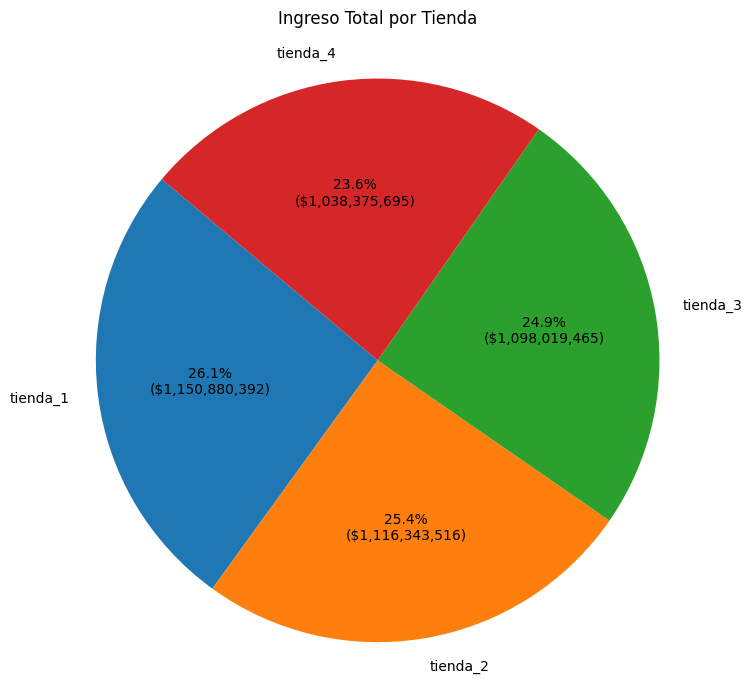

In [112]:
#Grafica para Ingresos totales por tienda
ingresos = {}

for nombre, df in tiendas.items():
  total = df['Precio'].sum()
  ingresos[nombre] = total

def formato_autopct(pct,allvals):
  valor = int(round(pct/100.*sum(allvals)))
  return f'{pct:.1f}%\n(${valor:,})'

plt.figure(figsize=(8,8))
plt.pie(
    ingresos.values(),
    labels=ingresos.keys(),
    autopct=lambda pct: formato_autopct(pct,list(ingresos.values())),
    startangle=140
)

plt.title("Ingreso Total por Tienda\n")
plt.axis('equal')
plt.tight_layout
plt.show()

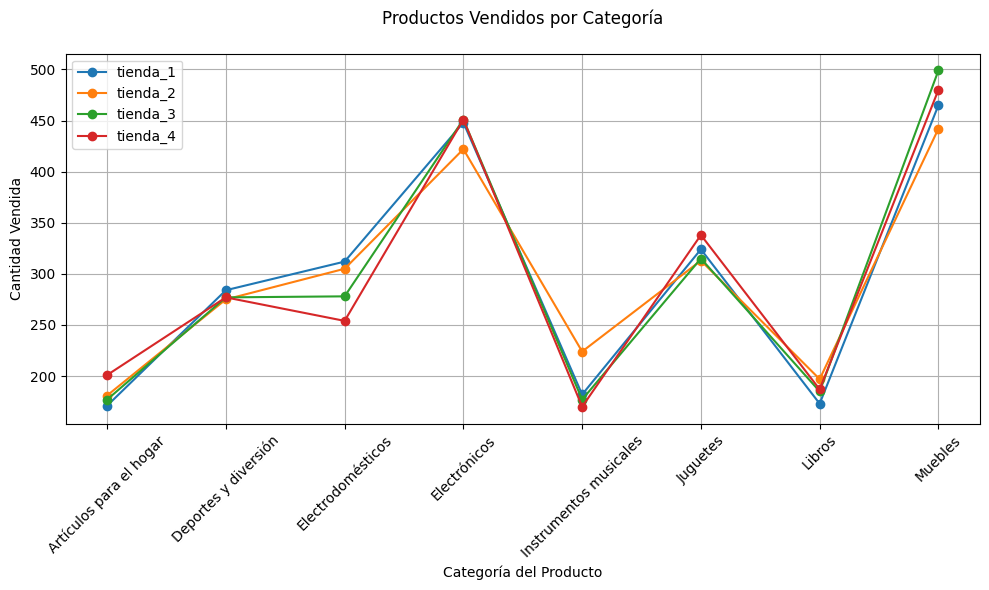

In [113]:
#Grafico Productos Vendidos por tienda
categorias = set()
for df in tiendas.values():
  categorias.update(df['Categoría del Producto'].unique())
categorias = sorted(list(categorias))

plt.figure(figsize=(10,6))

for nombre, df in tiendas.items():
  ventas = df['Categoría del Producto'].value_counts()
  venta_categoria = [ventas.get(cat,0) for cat in categorias]
  plt.plot(categorias,venta_categoria,marker='o',label=nombre)

plt.title("Productos Vendidos por Categoría\n")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

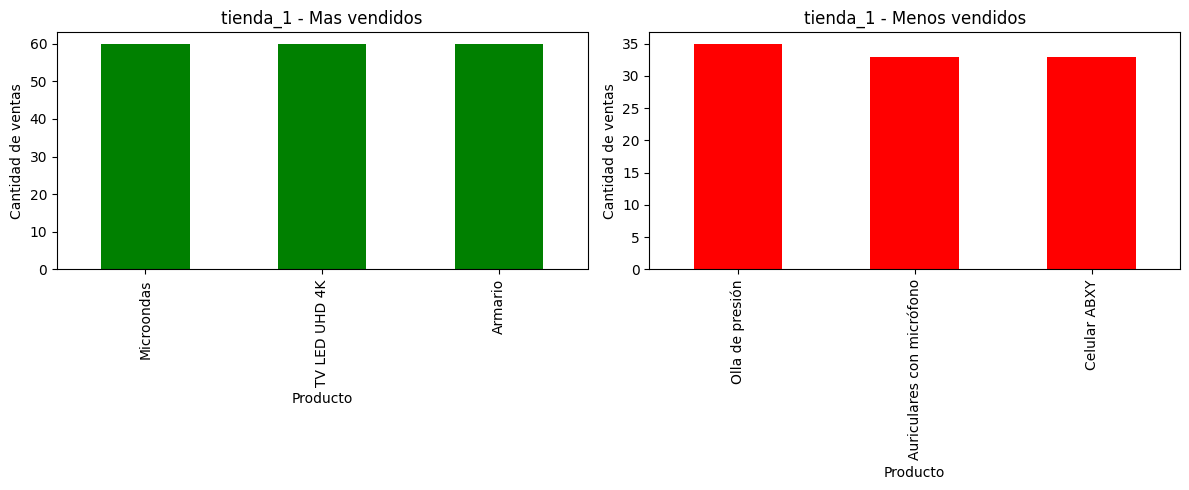

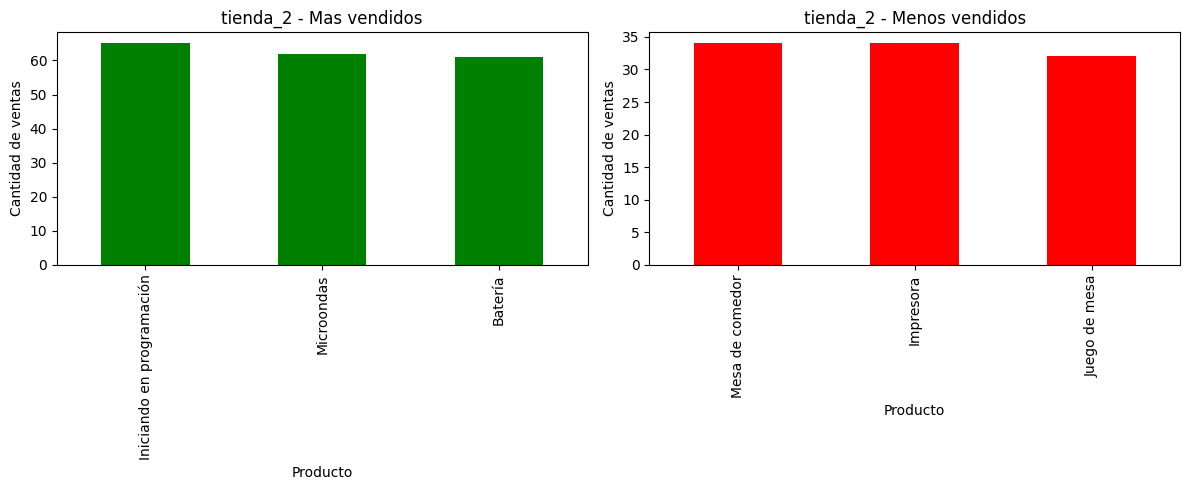

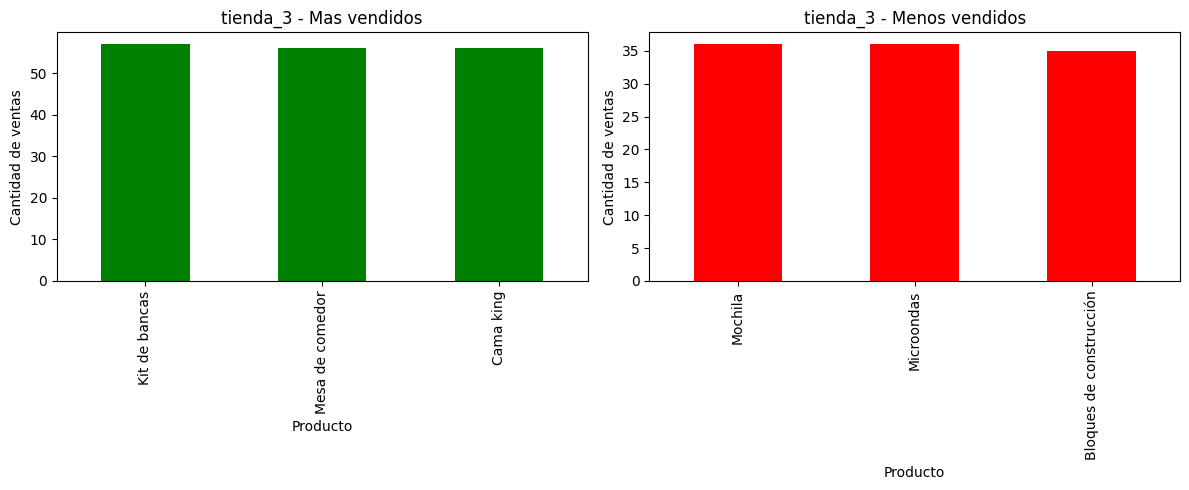

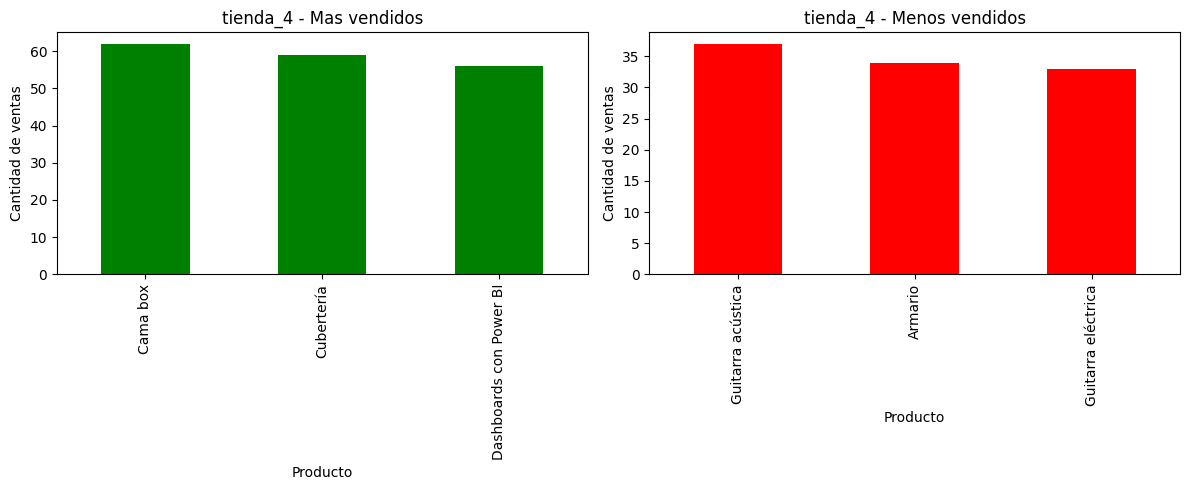

In [115]:
#Gráficas para Productos Mas vendidos y Menos Vendidos por tienda
for nombre,df in tiendas.items():
  conteo = df['Producto'].value_counts()
  max_3 = conteo.head(3)
  min_3 = conteo.tail(3)

  fig, axes = plt.subplots(1,2,figsize=(12,5))

  max_3.plot(kind='bar',ax=axes[0],color='green')
  axes[0].set_title(f"{nombre} - Mas vendidos")
  axes[0].set_ylabel("Cantidad de ventas")

  min_3.plot(kind='bar',ax=axes[1],color='red')
  axes[1].set_title(f"{nombre} - Menos vendidos")
  axes[1].set_ylabel("Cantidad de ventas")

  plt.tight_layout()
  plt.show()

#Introducción
El propósito del siguiente análisis es determinar cuál de las tiendas evaluadas presenta el peor rendimiento general, con el objetivo de recomendar al Sr. Juan cuál d ellas debe ser vendida para empezar un nuevo emprendimiento.

El análisis toma en cuenta:

    Ingresos totales.

    Categorías de productos con baja rotación.

    Calificaciones de los clientes.

    Productos con pocas ventas.

    Coste de envío promedio.

Identificar la tienda con más debilidades servirá para tomar una decisión informada sobre cuál cerrar o vender de cara a una nueva oportunidad de negocio.

#Desarrollo
##Ingresos totales por tienda
La **Tienda 4** generó el **ingreso total más bajo** entre las analizadas, presentando el **23.6% del total general**.

Se interpreta el bajo volumen como una **falta de atracción comercial y de competitividad** frente a las demás tiendas.

##Ventas por categoría
En cuanto a ventas por categoría, las cuatro tiendas muestran un patrón común: las tres categorías más vendidas son **Muebles, Electrónicos y Juguetes**.
A su vez, la categoría con **menor volumen de ventas** en la mayoría de las tiendas es Artículos para el hogar.

Esto indica una preferencia clara del consumidor, pero también revela que la variedad de productos menos vendidos es similar en todas.

Manteniendo el enfoque en **Tienda 4** se puede observar como tiene una menor cantidad total de productos vendidos comparado con **Tienda 1 y Tienda 3**

##Valoración media por tienda
En el apartado de la calificación otorgada por los clientes se tienen resultados bastante similares, la mayoría encontrándose por arriba de los **4 puntos** en una escala de 1 a 5.

No obstante, destaca que la **Tienda 1** obtuvo la calificación más baja con **3.98 puntos**, lo que sugiere una menor satisfacción del cliente.

Curiosamente, esto contrasta con su **mayor nivel de ingresos**, indicando que los volúmenes de venta no necesariamente reflejan buena experiencia del usuario.

##Poductos más vendidos y menos vendidos
Los productos más vendidos refuerzan el patrón visto en las categorías. La mayoría de las tiendas presentan **ventas superiores a 60 unidades** en sus productos estrella.

En este aspecto, la **Tienda 3** fue la que mostró un rendimiento más equilibrado (sin un único producto destacado), lo que podría indicar una **venta más distribuida entre su catálogo**, pero también **falta de un producto dominante o popular**.

##Valor de envío promedio por tienda
En esta métrica, la **Tienda 1** presenta el **mayor coste de envío promedio** con un valor de **26,018.61**, mientras que la **Tienda 4** tiene el **más bajo**, con un valor de **23,459.46**.

Aunque este es un punto a favor de Tienda 4, no ha sido suficiente para mejorar sus ventas ni su rendimiento general.

#Conclusión y Recomendación
Tras analizar los datos, se concluye que la **Tienda 4** presenta el peor rendimiento general en comparación con las demás.   

*   Menor ingreso total entre todas las tiendas
*   Volumen de ventas ligeramente inferior en todas las categorías.
*   Calificación media moderada (4.00), sin destacar ni en positivo ni en negativo.
*   No presenta productos líderes con alto volumen de ventas.
*   A pesar de tener el menor costo de envío, no logra mejorar su posición competitiva.

Se recomienda al Sr. Juan **vender o reiniciar operaciones en la Tienda 4** para emprender un nuevo proyecto comercial.
Su bajo impacto actual la convierte en una candidata ideal para comenzar desde cero, con una nueva estrategia de negocio, mejor propuesta de valor y renovado enfoque comercial.




    

    

    

    